In [ ]:
"""
Title: CSE803 Homework 1
Author: Javen W. Zamojcin
Email: zamojci1@msu.edu
Date: 2024/09/12
"""

In [405]:
from dolly_zoom import *
from numpy.linalg import norm
from itertools import product
from scipy import spatial
import itertools
import os
import imageio
import math
import cv2

In [25]:
def rotY(theta):
    return np.array([[math.cos(theta), 0, math.sin(theta)], [0, 1, 0], [-math.sin(theta), 0, math.cos(theta)]])

def rotX(theta):
    return np.array([[1, 0, 0], [0, math.cos(theta), -math.sin(theta)], [0, math.sin(theta), math.cos(theta)]])

In [23]:
"""
Q1.) 
Part A.)
"""
def generate_gif():
    n_frames = 30
    if not os.path.isdir("frames"):
        os.mkdir("frames")
    fstr = "frames/%d.png"
    for i,theta in enumerate(np.arange(0,2*np.pi,2*np.pi/n_frames)):
        fname = fstr % i
        renderCube(f=15, t=(0,0,3), R=rotY(theta))
        plt.savefig(fname)
        plt.close()
    
    with imageio.get_writer("cube.gif", mode='I') as writer:
        for i in range(n_frames):
            frame = plt.imread(fstr % i)
            frame *= 255
            frame = frame.astype(np.uint8)
            writer.append_data(frame)
            os.remove(fstr%i)

generate_gif()

Cube A: rotX() * rotY()


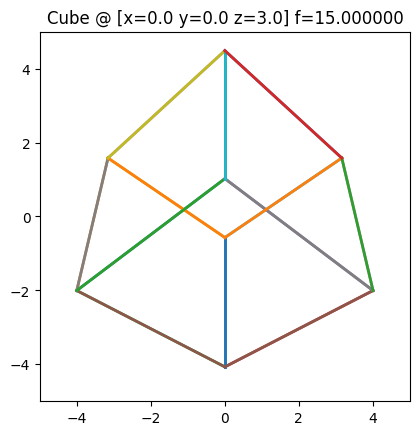

Cube A: rotY() * rotX()


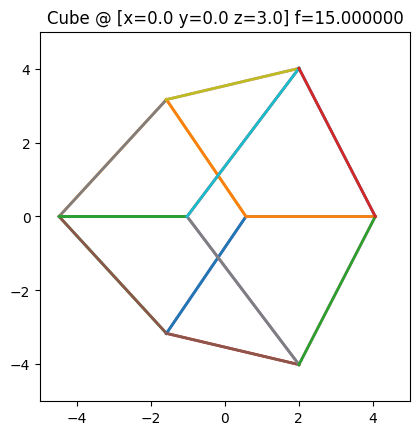

'\nQ: Are 3D rotation matrices commutative?\nA: No. The rotation order matters.\n'

In [164]:
"""
Q1.) 
Part B.)
"""
theta = np.pi / 4

print("Cube A: rotX() * rotY()")
rot_a = np.matmul(rotX(theta), rotY(theta))
renderCube(f=15, t=(0,0,3), R=rot_a)
plt.show()

print("Cube A: rotY() * rotX()")
rot_b = np.matmul(rotY(theta), rotX(theta))
renderCube(f=15, t=(0,0,3), R=rot_b)
plt.show()

"""
Q: Are 3D rotation matrices commutative?
A: No. The rotation order matters.
"""

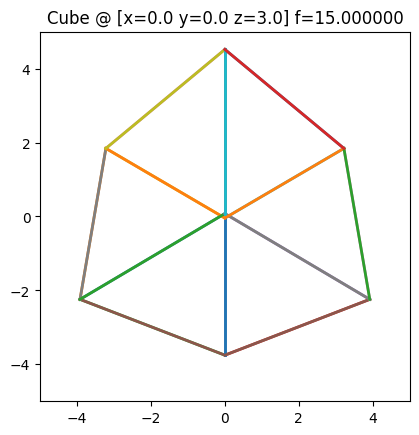

In [162]:
"""
Q1.) 
Part C.)
"""
x_theta = np.pi / 5
y_theta = np.pi / 4
rot = np.matmul(rotX(x_theta), rotY(y_theta))
renderCube(f=15, t=(0,0,3), R=rot)
plt.show()

"""
Q: Report the order and parameters where one diagonal of the cube is projected to a single point.
A: x_theta = (np.pi / 5), y_theta = (np.pi / 4), order = (rotX() * rotY())
"""

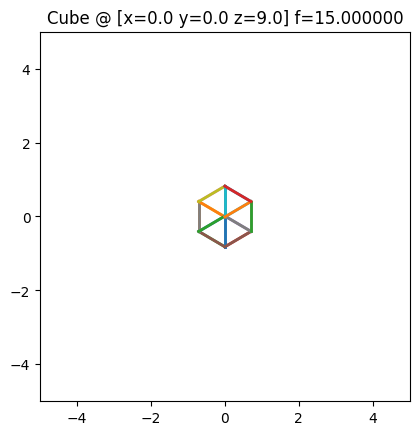

In [173]:
"""
Q1.) 
Part D.)
"""

def orthoproject_lines(f,R,t,L):
    #Given:
    #  Nx6 lines [x1,y1,z1,x2,y2,z2]
    #  3x3 rotation matrix R
    #  3x1 translation t
    #  scalar focal length f
    #Return:
    #  Nx4 projection of lines [u1,v1,u2,v2]
    pL = np.zeros((L.shape[0],4))
    K = np.array([[1, 0, 0], [0, 1, 0]])
    
    for i in range(L.shape[0]):
        #rotate and translate
        p1 = np.dot(R,L[i,:3])+t
        p2 = np.dot(R,L[i,3:])+t
        #apply orthographic projection: uv = I[2x3] * [x, y, z] = P[2x1]
        pL[i, :2] = K.dot(p1)
        pL[i, 2:] = K.dot(p2)
    return np.vstack(pL)

def render_orthocube(f=1,scaleFToSize=None,t=(0,0,1),R=np.eye(3)):
    #Given:
    #   f -- the focal length
    #   scaleFToSize -- a target size on the retina (sqrt of area)
    #   t -- where the cube is with respect to the camera axes
    #   R -- a rotation
    #Render the cube
    L = generateCube()
    t = np.array(t)
    pL = orthoproject_lines(f,R,t,L)
    
    if scaleFToSize is not None:
    #then adjust f so that the image is the right size
        xRange, yRange = xyrange(pL)
        geoMean = (xRange*yRange)**0.5
        f = (f / geoMean)*scaleFToSize
        #re-render with the right focal length
        pL = orthoproject_lines(f,R,t,L)
            
    plt.figure()
    plt.title("Cube @ [x=%.1f y=%.1f z=%.1f] f=%f" % (t[0],t[1],t[2],f))
    for i in range(pL.shape[0]):
        u1, v1, u2, v2 = pL[i,:]
        plt.plot((u1,u2),(v1,v2),linewidth=2)
                    
    plt.axis('square')
    plt.xlim(-5,5); plt.ylim(-5,5)


# render cube with orthographic camera
x_theta = np.pi / 5
y_theta = np.pi / 4
rot = np.matmul(rotX(x_theta), rotY(y_theta))
render_orthocube(f=15, t=(0,0,9), R=rot)
plt.show()

"""
Orthographic Projection: uv = I[2x3] * [x, y, z] = P[2x1]
"""

(341, 393, 3)


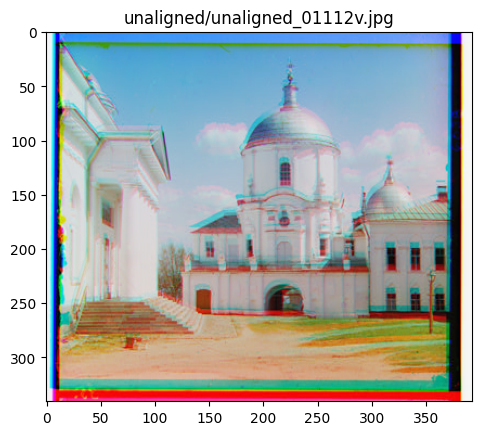

In [418]:
"""
Q2.) 
Part A.)
"""

def slice(_img):
    width = _img[0].size
    height = len(_img)
    offset = np.floor(height / 3.0).astype(int)
    b = _img[:offset]
    g = _img[offset: 2 * offset]  # [offset: -offset]
    r = _img[2 * offset: 3 * offset]
    stacked = np.stack([r, g, b], axis=0) # -1
    return stacked

img_path = "prokudin-gorskii/01112v.jpg"
stacked_img = slice(plt.imread(img_path))

img_name = "unaligned/unaligned_01112v.jpg"
plt.title(img_name)
display_img = np.moveaxis(stacked_img, 0, 2)
print(display_img.shape)
plt.imshow(display_img)
plt.imsave(img_name, display_img)

efros_tableau.jpg (3, 421, 510)
(0, 0) (0, 10) (0, 5)
(421, 510, 3)


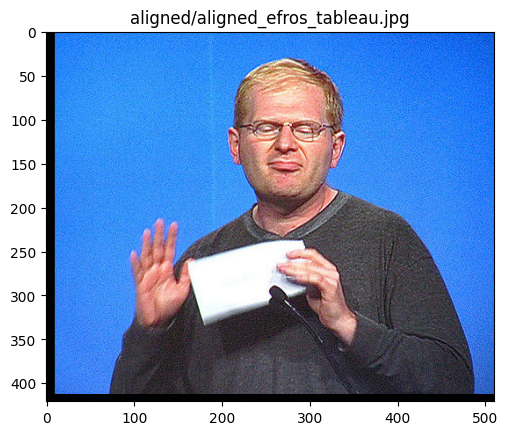

00351v.jpg (3, 341, 396)
(0, 0) (-9, 0) (-13, 1)
(341, 396, 3)


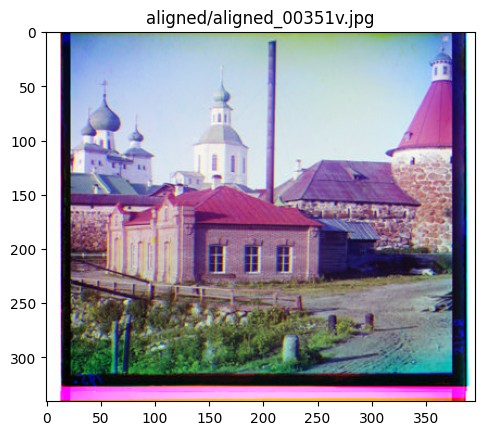

00398v.jpg (3, 341, 397)
(0, 0) (0, 1) (-8, 2)
(341, 397, 3)


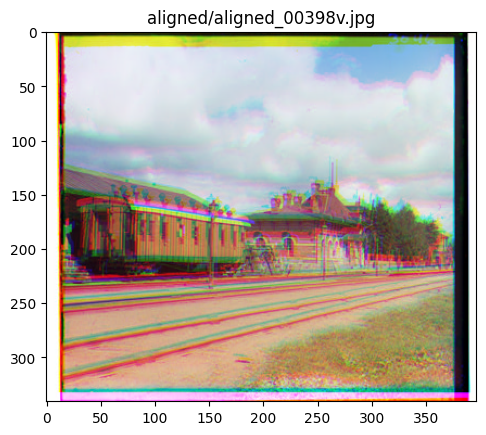

00153v.jpg (3, 341, 394)
(0, 0) (-13, -2) (-11, -3)
(341, 394, 3)


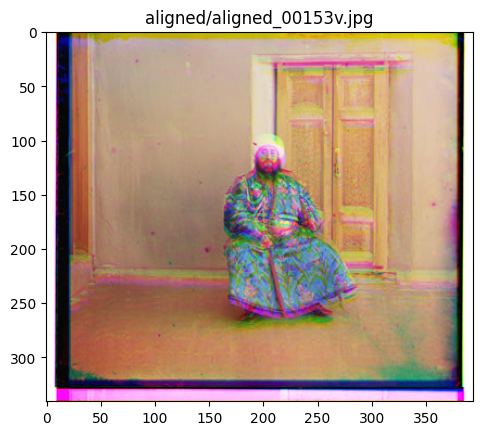

00149v.jpg (3, 341, 397)
(0, 0) (-5, 0) (-9, -1)
(341, 397, 3)


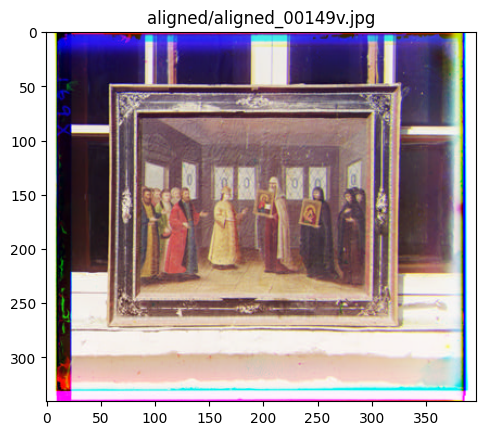

00125v.jpg (3, 341, 400)
(0, 0) (-4, 1) (-10, 2)
(341, 400, 3)


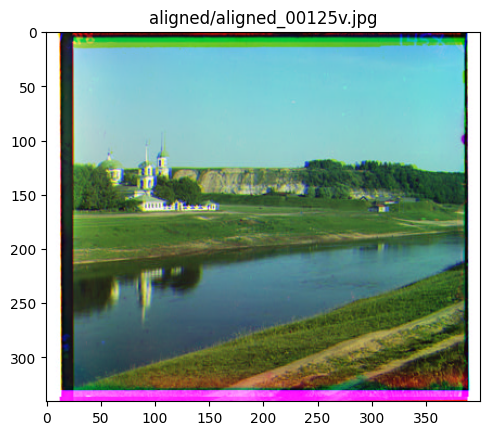

01112v.jpg (3, 341, 393)
(0, 0) (-8, -1) (-8, -3)
(341, 393, 3)


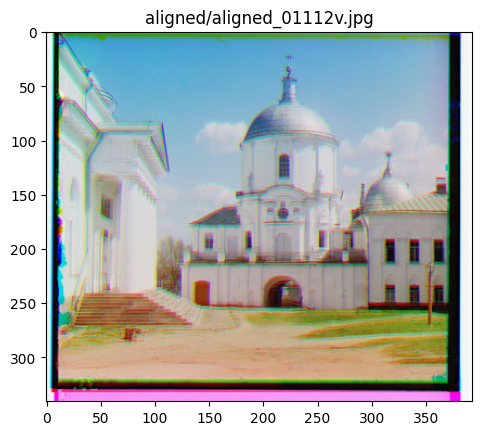

In [400]:
"""
Q2.) 
Part B.)
"""
offsets = list(itertools.combinations_with_replacement(range(-15, 15 + 1), 2))

def load_images(folder):
    _images = {}
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            _img = plt.imread(os.path.join(folder,filename))
            if _img is not None:
                _images[filename] = slice(_img)
                display_img = np.moveaxis(_images[filename], 0, 2)
                plt.imsave("unaligned/" + filename, display_img)
    return _images

def score(A, B, method="NCC"):
    if method == "SSD":
        return -np.sum(np.sum((A - B) ** 2))
    if method == "NCC":
        A = np.ndarray.flatten(A)
        B = np.ndarray.flatten(B)
        return np.dot(A / norm(A), B / norm(B))

def shift(img, offset):
    return np.roll(img, offset, (0, 1))

def score_offsets(A, B):
    return [score(shift(A, offset), B) for offset in offsets]

def find_offset(A, B):
    return offsets[np.argmax(score_offsets(A, B))]

def align(_img):
    offset_0 = (0, 0)
    offset_1 = find_offset(_img[1], _img[0])
    offset_2 = find_offset(_img[2], _img[0])
    _img[1] = shift(_img[1], offset_1)
    _img[2] = shift(_img[2], offset_2)
    print(offset_0, offset_1, offset_2)
    return _img

images = load_images("prokudin-gorskii")
for fname in images:
    img = images[fname]
    print(fname, img.shape)
    aligned = align(img)

    img_name = f"aligned/aligned_{fname}"
    plt.title(img_name)
    display_img = np.moveaxis(aligned, 0, 2)
    print(display_img.shape)
    plt.imshow(display_img)
    plt.show()
    plt.imsave(img_name, display_img)

seoul_tableau.jpg (3, 1088, 1636)
(3, 544, 818)
half offsets: (0, 3), (-1, 1)
full offsets: (0, 3), (-1, 0)
total offsets: (0, 6), (-2, 1)
(1088, 1636, 3)


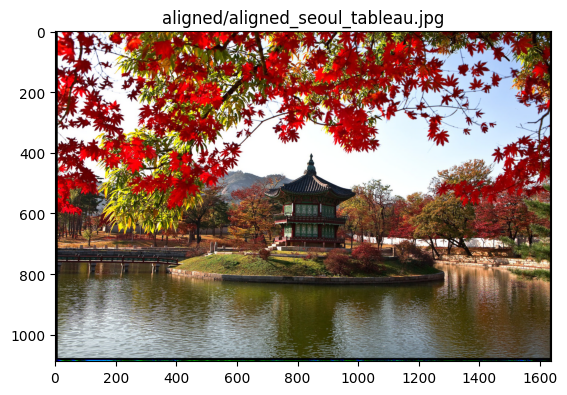

vancouver_tableau.jpg (3, 1091, 1650)
(3, 545, 825)
half offsets: (-1, 11), (4, 6)
full offsets: (0, 11), (4, 6)
total offsets: (-1, 22), (8, 12)
(1091, 1650, 3)


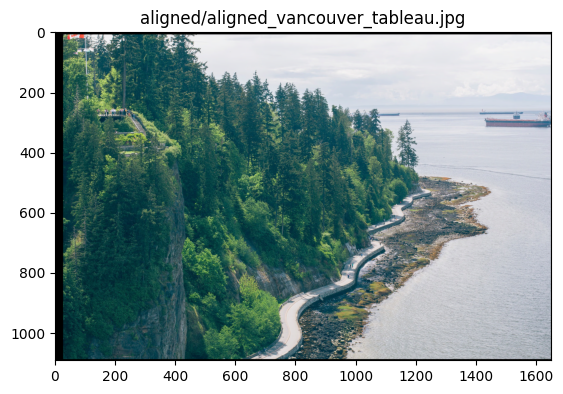

In [424]:
"""
Q2.) 
Part C.)
"""

def resize(img, scale):
    width = img[0].shape[1]
    height = img[0].shape[0]
    dsize = (int(width * scale), int(height * scale))
    # print((width, height), dsize)
    
    # return cv2.resize(img, (0, 0), fx = scale, fy = scale)
    img_0 = cv2.resize(img[0], dsize)
    img_1 = cv2.resize(img[1], dsize)
    img_2 = cv2.resize(img[2], dsize)

    stacked = np.stack([img_0, img_1, img_2], axis=0)
    return stacked

images = load_images("tableau")
for fname in images:
    full_img = images[fname]
    print(fname, full_img.shape)

    half_img = resize(full_img, 0.5)
    print(half_img.shape)

    half_offset1 = find_offset(half_img[1], half_img[0])
    half_offset2 = find_offset(half_img[2], half_img[0])
    full_img[1] = shift(full_img[1], half_offset1)
    full_img[2] = shift(full_img[2], half_offset2)

    full_offset1 = find_offset(full_img[1], full_img[0])
    full_offset2 = find_offset(full_img[2], full_img[0])
    full_img[1] = shift(full_img[1], full_offset1)
    full_img[2] = shift(full_img[2], full_offset2)

    total_offset1 = (half_offset1[0] + full_offset1[0], half_offset1[1] + full_offset1[1])
    total_offset2 = (half_offset2[0] + full_offset2[0], half_offset2[1] + full_offset2[1])

    print(f"half offsets: {half_offset1}, {half_offset2}")
    print(f"full offsets: {full_offset1}, {full_offset2}")
    print(f"total offsets: {total_offset1}, {total_offset2}")
    
    img_name = f"aligned/aligned_{fname}"
    plt.title(img_name)
    display_img = np.moveaxis(full_img, 0, 2)
    print(display_img.shape)
    plt.imshow(display_img)
    plt.show()
    plt.imsave(img_name, display_img)

(256, 256, 4)
(4, 256, 256)


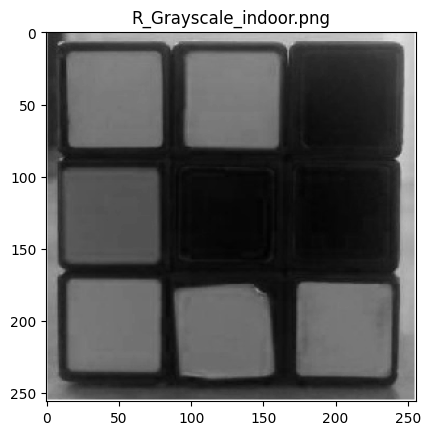

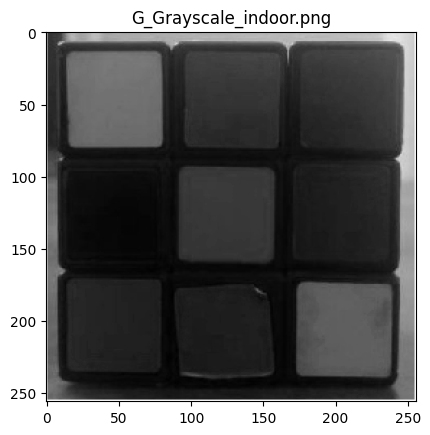

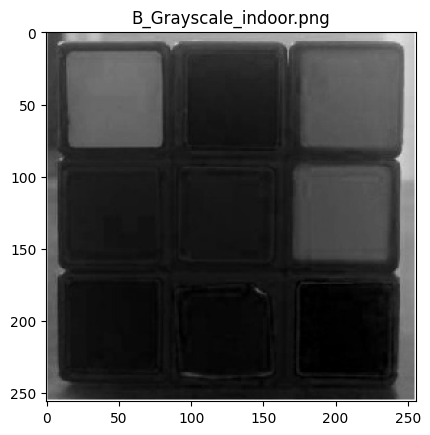

(4, 256, 256)


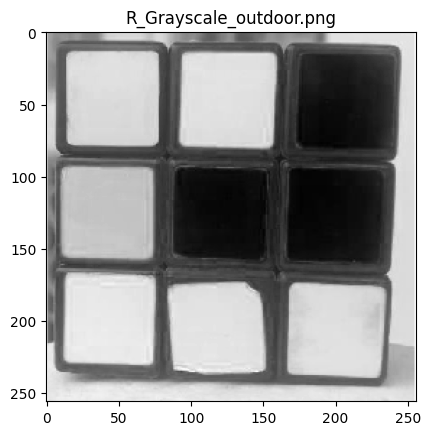

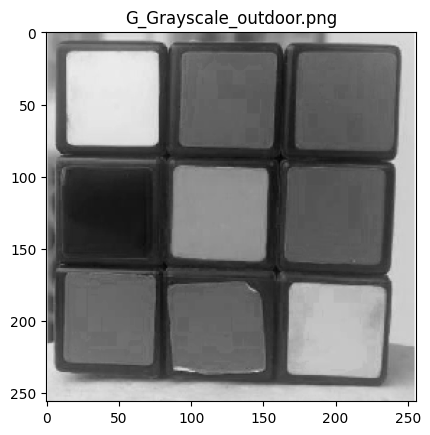

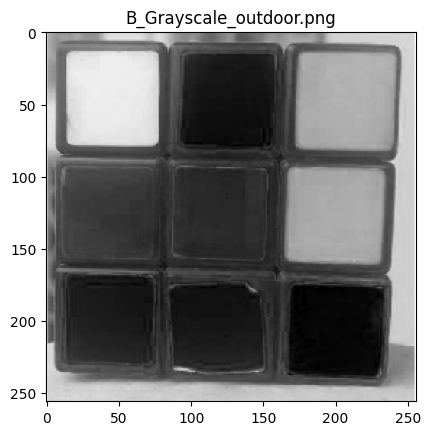

(3, 256, 256)


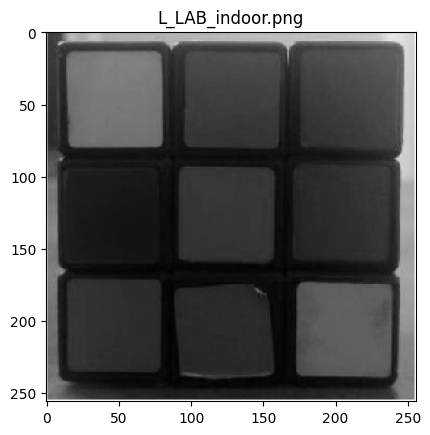

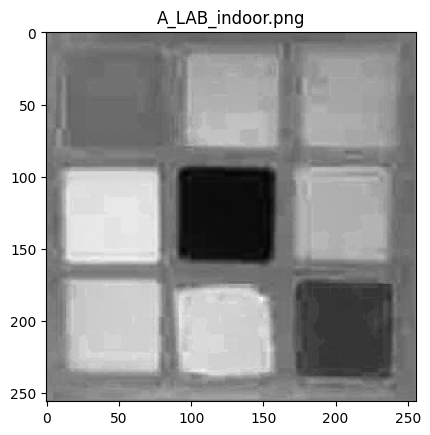

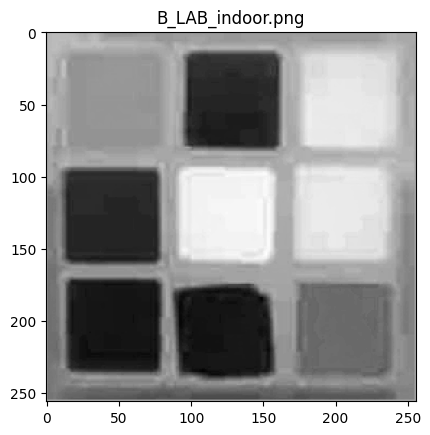

(3, 256, 256)


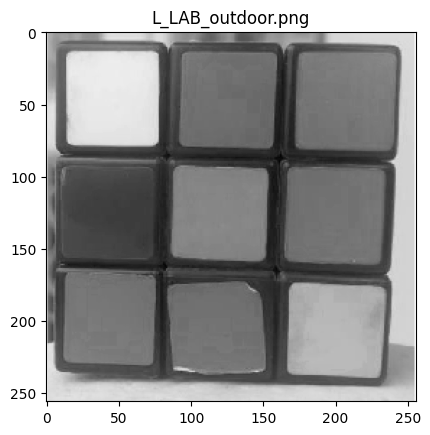

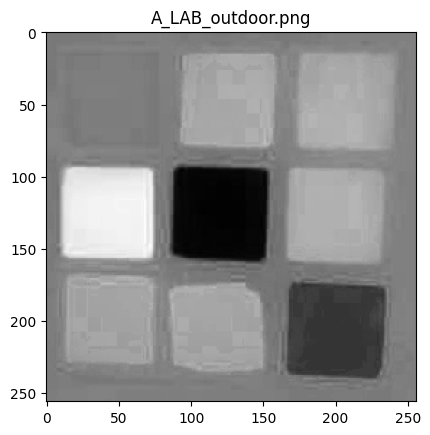

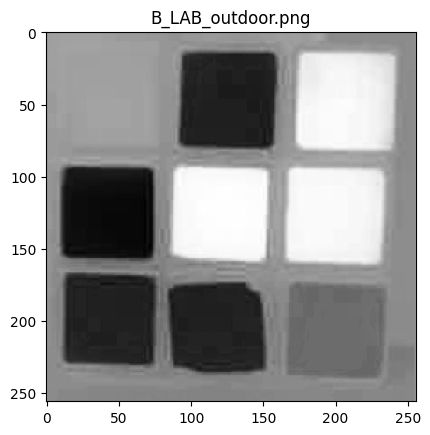

In [478]:
"""
Q3.) 
Part A.)
"""
indoor_img = plt.imread("indoor.png", 0)
outdoor_img = plt.imread("outdoor.png", 0)

print(indoor_img.shape)

def display_grayscale(img, name): 
    display_img = np.moveaxis(img, -1, 0)
    print(display_img.shape)

    plt.title(f"R_Grayscale_{name}")
    plt.imshow(display_img[0] * norm(display_img[0]), cmap='gray')
    plt.show()
    plt.title(f"G_Grayscale_{name}")
    plt.imshow(display_img[1] * norm(display_img[1]), cmap='gray')
    plt.show()
    plt.title(f"B_Grayscale_{name}")
    plt.imshow(display_img[2] * norm(display_img[2]), cmap='gray')
    plt.show()

display_grayscale(indoor_img, "indoor.png")
display_grayscale(outdoor_img, "outdoor.png")

def display_lab(img, name):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    display_img = np.moveaxis(lab, -1, 0)
    print(display_img.shape)

    plt.title(f"L_LAB_{name}")
    plt.imshow(display_img[0], cmap='gray')
    plt.show()
    plt.title(f"A_LAB_{name}")
    plt.imshow(display_img[1], cmap='gray')
    plt.show()
    plt.title(f"B_LAB_{name}")
    plt.imshow(display_img[2], cmap='gray')
    plt.show()

display_lab(indoor_img, "indoor.png")
display_lab(outdoor_img, "outdoor.png")

In [ ]:
"""
Q3.) 
Part B.)

Q: How do you know the illuminance change is better separated in LAB color space?
A: In the RGB color space, brightness information is coupled with all three color channels.
   In LAB, the L channel is independent of color and will only capture brightness information.
"""